### Data Science with Python Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

a   -0.982660
b    1.505148
c    0.242708
d   -0.648791
e   -1.383409
dtype: float64

In [3]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.689268
b   -0.157493
c    1.598947
d   -0.385785
e   -1.628642
dtype: float64

In [4]:
print(s[0])

-0.6892683577286345


In [5]:
df = pd.DataFrame(s, columns = ['column 1'])
df

,column 1
a,-0.689268
b,-0.157493
c,1.598947
d,-0.385785
e,-1.628642


In [6]:
df['column 1']

a   -0.689268
b   -0.157493
c    1.598947
d   -0.385785
e   -1.628642
Name: column 1, dtype: float64

In [7]:
df['column 2'] = df['column 1'] * 4
df

,column 1,column 2
a,-0.689268,-2.757073
b,-0.157493,-0.629971
c,1.598947,6.395789
d,-0.385785,-1.543139
e,-1.628642,-6.514569


In [8]:
df['column 3'] = (df['column 1'] + df['column 2']) / 2
df

,column 1,column 2,column 3
a,-0.689268,-2.757073,-1.723171
b,-0.157493,-0.629971,-0.393732
c,1.598947,6.395789,3.997368
d,-0.385785,-1.543139,-0.964462
e,-1.628642,-6.514569,-4.071606


In [9]:
 a = df.sort_values(by = 'column 2', ascending=False)
a

,column 1,column 2,column 3
c,1.598947,6.395789,3.997368
b,-0.157493,-0.629971,-0.393732
d,-0.385785,-1.543139,-0.964462
a,-0.689268,-2.757073,-1.723171
e,-1.628642,-6.514569,-4.071606


In [10]:
df[df['column 2'] <= 2]

,column 1,column 2,column 3
a,-0.689268,-2.757073,-1.723171
b,-0.157493,-0.629971,-0.393732
d,-0.385785,-1.543139,-0.964462
e,-1.628642,-6.514569,-4.071606


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [12]:
df = pd.read_csv('GlobalTemperatures.csv')
df.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(3192, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [15]:
dfa = df.iloc[:, :2]
dfa.head(3)

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626


In [16]:
dfa.dtypes

dt                         object
LandAverageTemperature    float64
dtype: object

In [17]:
dfa.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


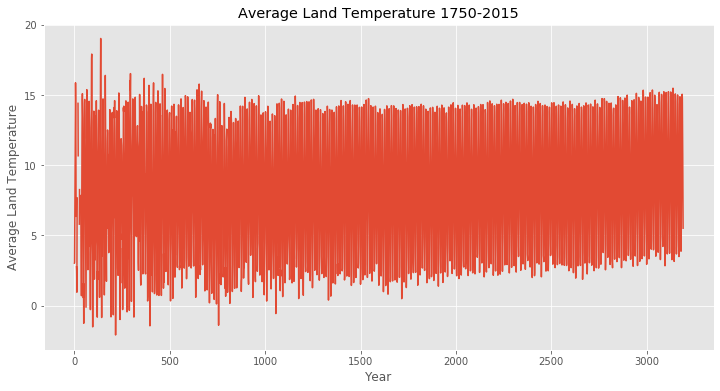

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(dfa['LandAverageTemperature'])
plt.title('Average Land Temperature 1750-2015')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature');

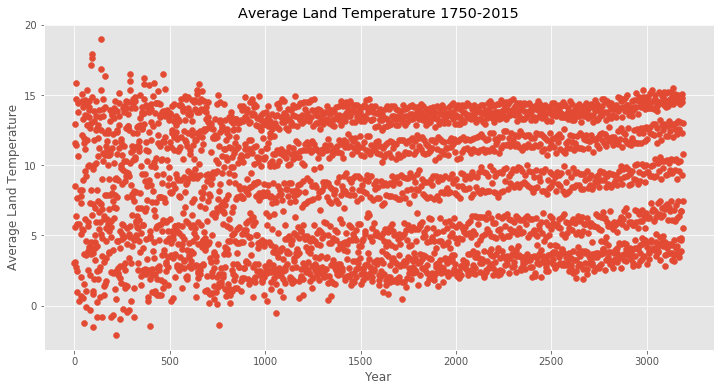

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(x = dfa['LandAverageTemperature'].index, y = dfa['LandAverageTemperature'])
plt.title('Average Land Temperature 1750-2015')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature');

In [20]:
times = pd.DatetimeIndex(dfa['dt'])
grouped = dfa.groupby([times.year]).mean()

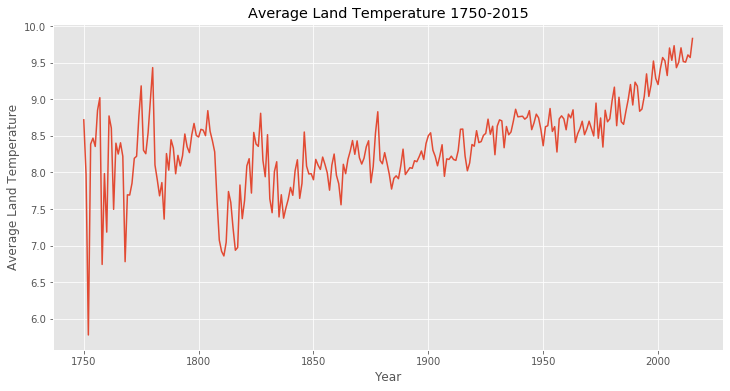

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(grouped['LandAverageTemperature'])
plt.title('Average Land Temperature 1750-2015')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature');

In [22]:
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [35]:
dfa[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,0.348
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,8.265
29,1752-06-01,8.265
30,1752-07-01,8.265
31,1752-08-01,8.265
32,1752-09-01,8.265
33,1752-10-01,7.839


In [34]:
dfa[np.isnan(dfa['LandAverageTemperature'])]

,dt,LandAverageTemperature


In [32]:
dfa['LandAverageTemperature'] = dfa['LandAverageTemperature'].fillna(method='ffill')

In [33]:
dfa

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,2015-08-01,14.755
3188,2015-09-01,12.999
3189,2015-10-01,10.801
3190,2015-11-01,7.433


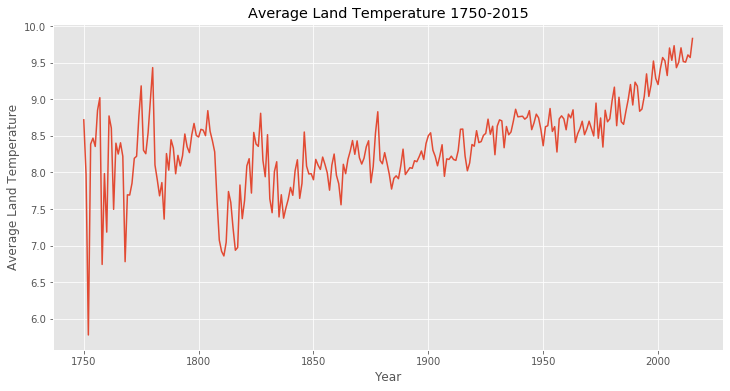

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(grouped['LandAverageTemperature'])
plt.title('Average Land Temperature 1750-2015')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature');